# Neural Networks and Reinforcement Learning

Neural Networks are modeled after biological neural networks and attempt to allow computers to learn in a similar manner to humans. 

Use cases:
    - Pattern Recognition
    - Time Series Predictions
    - Signal Processing
    - Anomaly Detection
    - Controlling Self Driving Vehicles
    
The human brain has interconnected neurons with dendrites that recieve electricaland hormonal inputs, and then, based on those inputs, produce an electrical signal output through the axon.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/1024px-Neuron.svg.png">

There are real world problems that are very difficult for humans do to, but easy for computers to do. (e.g. calculating large arithmetic problems)

There are also real world problems that are very difficult for a computer to do, but extremely difficult for a computer to do. (e.g. recognizing a picture of a person)

Neural Networks attempt to solve problems that would be easy for humans, but hard for computers. 

### Perceptron

A perceptron consists of one or more inputs, a processor, and a single output

A perceptron follows the "feed-forward" model, meaning inputs are sent into the neuron, are processed, and result in an output.

<img src = "https://miro.medium.com/max/1290/0*LJBO8UbtzK_SKMog">

A perceptron process follows 4 main steps:
- 1) Receive Inputs
- 2) Weight Inputs
- 3) Sum Inputs
- 4) Generate Output

Let's say we have a perceptron with two inputs:
     - Input 0 : x1 = 12
     - Input 1 : x2 = 4
     
Each input that is sent into the neuron must first be weighted, i.e. multiplied by some value (often a number between -1 and 1). When creating a perceptron, we'll typically begin by assigning random weights.

Let's say we have a perceptron with two inputs:
     - Weight 0 : 0.5
     - Weight 1 : -1.0
     
We take each input and multiply it by its weight

     - Input 0 * Weight 0: 12 * 0.5 = 6
     - Input 1 * Weight 1: 4 * -1.0 = -4
     
The output of a perceptron is generated by passing that sum through an activation function. In the case of a simple binary output, the activation function is what tells the percepton whether to "fire" or not.

There are many activation functions to choose from (logistic, trigonometic, step, sigmoid, etc...). Let's make the activation function the sign of the sum. In other words, if the sum is a postive number, the output is 1; if negative, the output is -1.

One more thing to consider is Bias. Imagine that both inputs were equal to zero, then any sum no matter what multiplicative weight would also be zero. We can resolve this issue for this case by adding another input equal to 1.

### Training the Perceptron

To actually train the perceptron, we use the following steps: 
- 1) Provide the perceptron with inputs for which there is a known answer
- 2) Ask the peceptron to guess an answer.
- 3) Compute the error (How far off from the correct answer?)
- 4) Adjust all the weights according to the error.
- 5) Return to Step 1 and repeat

We repeat this flow until we reach an error we are satisfied with (we set this before hand).


### Deep Learning

You may have heard the term "Deep Learning." That's just a neural network with many hidden layers, causing it to be very "deep." For example, Microsoft's vision recognition system uses 152 layers.

<img src = "http://houseofbots.com/images/news/2590/0img.png">

In [1]:
# install.packages("MASS")
library(MASS)
options(warn=-1)

Warning message:
"package 'MASS' was built under R version 3.6.2"

In [2]:
head(Boston)
str(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [3]:
any(is.na(Boston))

[1] FALSE

In [4]:
data <- Boston

In [5]:
maxs <- apply(data, 2, max )
maxs

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [6]:
mins <- apply(data, 2, min )
mins

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

In [7]:
scaled.data <- scale(data,center = mins, scale = maxs - mins)

In [8]:
class(scaled.data)

[1] "matrix"

In [9]:
scaled.data <- as.data.frame(scaled.data)
head(scaled.data)
summary(scaled.data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


      crim                 zn             indus             chas        
 Min.   :0.0000000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0008511   1st Qu.:0.0000   1st Qu.:0.1734   1st Qu.:0.00000  
 Median :0.0028121   Median :0.0000   Median :0.3383   Median :0.00000  
 Mean   :0.0405441   Mean   :0.1136   Mean   :0.3914   Mean   :0.06917  
 3rd Qu.:0.0412585   3rd Qu.:0.1250   3rd Qu.:0.6466   3rd Qu.:0.00000  
 Max.   :1.0000000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
      nox               rm              age              dis         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.1317   1st Qu.:0.4454   1st Qu.:0.4338   1st Qu.:0.08826  
 Median :0.3148   Median :0.5073   Median :0.7683   Median :0.18895  
 Mean   :0.3492   Mean   :0.5219   Mean   :0.6764   Mean   :0.24238  
 3rd Qu.:0.4918   3rd Qu.:0.5868   3rd Qu.:0.9390   3rd Qu.:0.36909  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

In [10]:
#install.packages("caTools")
library(caTools)

In [11]:
split <-  sample.split(scaled.data$medv, SplitRatio = 0.7)
train <- subset(scaled.data, split == TRUE)
test <- subset(scaled.data, split == TRUE)

In [12]:
#install.packages("neuralnet")
library(neuralnet)

In [13]:
n <- names(train)
n
f <- as.formula(paste("medv ~ ", paste(n[!n %in% "medv"], collapse = " + ")))
f

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

In [54]:
nn <- neuralnet(f, data = train, hidden = c(5,3), linear.output = TRUE)

SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef


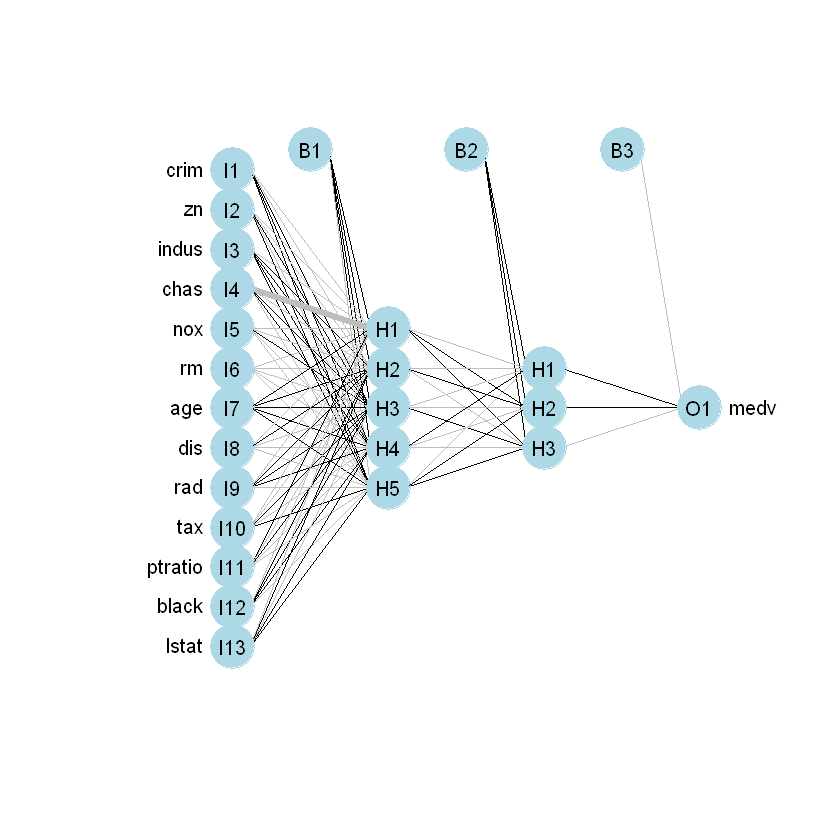

In [55]:
library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

plot.nnet(nn,struct=struct)

In [56]:
predicted.nn.values <- compute(nn, test[1:13])

In [57]:
str(predicted.nn.values)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:367, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:367] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:367, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:367] "1" "2" "3" "4" ...
  .. .. ..$ : NULL
  ..$ : num [1:367, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:367] "1" "2" "3" "4" ...
  .. .. ..$ : NULL
 $ net.result: num [1:367, 1] 0.457 0.377 0.549 0.642 0.467 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:367] "1" "2" "3" "4" ...
  .. ..$ : NULL


In [58]:
true.predictions <- predicted.nn.values$net.result * (max(data$medv)- min(data$medv))+min(data$medv)

In [59]:
test.r <- test$medv * (max(data$medv)- min(data$medv))+min(data$medv)

In [60]:
MSE.nn <- sum((test.r - true.predictions)^2)/nrow(test)
MSE.nn

[1] 4.42781

In [61]:
error.df <- data.frame(test.r, true.predictions)

In [62]:
head(error.df)

,test.r,true.predictions
,<dbl>,<dbl>
1,24.0,25.56593
2,21.6,21.98055
3,34.7,29.72428
4,33.4,33.89962
6,28.7,25.99512
7,22.9,21.78093


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


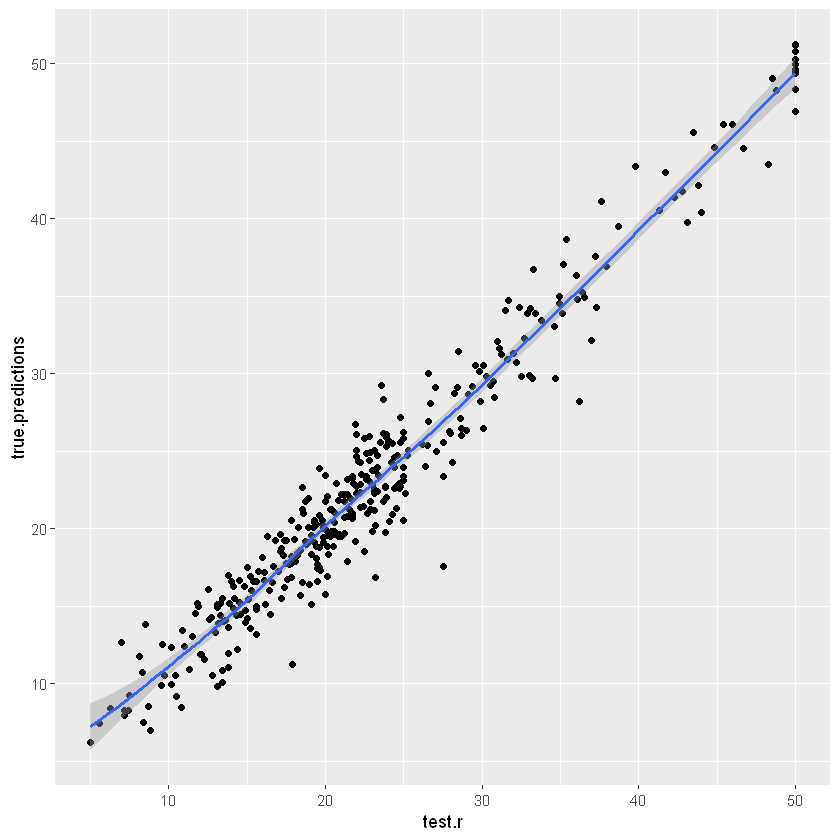

In [63]:
library(ggplot2)

ggplot(data = error.df, aes( x = test.r, y = true.predictions)) +
geom_point() +
stat_smooth()